## Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
master = pd.read_csv("/content/drive/MyDrive/DSCI599/599_Project/Master Data/aggregated_data.csv")

In [4]:
players_2023 = pd.read_csv("/content/drive/MyDrive/DSCI599/599_Project/Master Data/players_2023.csv")
players_2022 = pd.read_csv("/content/drive/MyDrive/DSCI599/599_Project/Master Data/players_2022.csv")
players_2021 = pd.read_csv("/content/drive/MyDrive/DSCI599/599_Project/Master Data/players_2021.csv")
players_2020 = pd.read_csv("/content/drive/MyDrive/DSCI599/599_Project/Master Data/players_2020.csv")
players_2019 = pd.read_csv("/content/drive/MyDrive/DSCI599/599_Project/Master Data/players_2019.csv")
players_2018 = pd.read_csv("/content/drive/MyDrive/DSCI599/599_Project/Master Data/players_2018.csv")


In [5]:
master.head()

,player_id,name,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,games_played_sum,goals_sum,...,sub_ins_sum,sub_outs_sum,yellow_cards_sum,red_cards_sum,goals_assists_sum,club_ids_all,win_pct_all,goals_pct_all,assists_pct_all,avg_mins_played_all
0,3333,James Milner,England,1986-01-04,Central Midfield,Midfield,right,175.0,212,9,...,5.0,13.0,33,0,26,"[1237, 31]",0.306604,0.020045,0.037862,44.462264
1,7161,Jonas Hofmann,Germany,1992-07-14,Attacking Midfield,Midfield,right,176.0,186,52,...,10.0,19.0,13,0,103,"[18, 15]",0.231183,0.135417,0.132812,73.204301
2,7825,Pepe Reina,Spain,1982-08-31,Goalkeeper,Goalkeeper,right,188.0,117,0,...,0.0,0.0,10,0,1,"[1050, 5, 398, 405]",0.205128,0.000000,0.004545,91.008547
3,12282,Daley Blind,Netherlands,1990-03-09,Centre-Back,Defender,left,180.0,51,3,...,2.0,1.0,7,0,7,"[12321, 610, 27]",0.313725,0.022556,0.030075,76.725490
4,12907,Alessio Cragno,Italy,1994-06-28,Goalkeeper,Goalkeeper,right,184.0,134,0,...,0.0,0.0,6,0,0,"[1390, 6574, 2919]",0.067164,0.000000,0.000000,90.223881


In [6]:
master.columns

Index(['player_id', 'name', 'country_of_citizenship', 'date_of_birth',
       'sub_position', 'position', 'foot', 'height_in_cm', 'games_played_sum',
       'goals_sum', 'minutes_played_sum', 'wins_sum', 'club_goals_sum',
       'assists_sum', 'clean_sheets_sum', 'headers_sum',
       'direct_freekicks_sum', 'penalties_sum', 'long_distance_kicks_sum',
       'solo_runs_sum', 'counter_attack_goals_sum', 'sub_ins_sum',
       'sub_outs_sum', 'yellow_cards_sum', 'red_cards_sum',
       'goals_assists_sum', 'club_ids_all', 'win_pct_all', 'goals_pct_all',
       'assists_pct_all', 'avg_mins_played_all'],
      dtype='object')

In [7]:
players_2023.columns

Index(['player_id', 'name', 'country_of_citizenship', 'date_of_birth',
       'sub_position', 'position', 'foot', 'height_in_cm',
       'market_value_in_eur', 'highest_market_value_in_eur',
       'contract_expiration_date', 'term_days_remaining', 'games_played',
       'club_ids', 'goals', 'minutes_played', 'wins', 'club_goals', 'assists',
       'clean_sheets', 'headers', 'direct_freekicks', 'penalties',
       'long_distance_kicks', 'solo_runs', 'counter_attack_goals', 'sub_ins',
       'sub_outs', 'yellow_cards', 'red_cards', 'win_pct', 'goals_assists',
       'goals_pct', 'assists_pct', 'avg_mins_played', 'age'],
      dtype='object')

In [8]:
from datetime import datetime, timedelta, date

master['date_of_birth'] = pd.to_datetime(master['date_of_birth'])
now = datetime.now()
master['age'] = (now - master['date_of_birth']).apply(lambda x: x.days) / 365.25
master['age'] = master['age'].round().astype(int)

master.columns

Index(['player_id', 'name', 'country_of_citizenship', 'date_of_birth',
       'sub_position', 'position', 'foot', 'height_in_cm', 'games_played_sum',
       'goals_sum', 'minutes_played_sum', 'wins_sum', 'club_goals_sum',
       'assists_sum', 'clean_sheets_sum', 'headers_sum',
       'direct_freekicks_sum', 'penalties_sum', 'long_distance_kicks_sum',
       'solo_runs_sum', 'counter_attack_goals_sum', 'sub_ins_sum',
       'sub_outs_sum', 'yellow_cards_sum', 'red_cards_sum',
       'goals_assists_sum', 'club_ids_all', 'win_pct_all', 'goals_pct_all',
       'assists_pct_all', 'avg_mins_played_all', 'age'],
      dtype='object')

In [9]:
players_2023['date_of_birth'] = pd.to_datetime(players_2023['date_of_birth'])
now = datetime.now()
players_2023['age'] = (now - players_2023['date_of_birth']).apply(lambda x: x.days) / 365.25
players_2023['age'] = players_2023['age'].round().astype(int)

In [10]:
players_2022['date_of_birth'] = pd.to_datetime(players_2022['date_of_birth'])
now = datetime.now()
players_2022['age'] = (now - players_2022['date_of_birth']).apply(lambda x: x.days) / 365.25
players_2022['age'] = players_2022['age'].round().astype(int)

players_2021['date_of_birth'] = pd.to_datetime(players_2021['date_of_birth'])
now = datetime.now()
players_2021['age'] = (now - players_2021['date_of_birth']).apply(lambda x: x.days) / 365.25
players_2021['age'] = players_2021['age'].round().astype(int)

players_2020['date_of_birth'] = pd.to_datetime(players_2020['date_of_birth'])
now = datetime.now()
players_2020['age'] = (now - players_2020['date_of_birth']).apply(lambda x: x.days) / 365.25
players_2020['age'] = players_2020['age'].round().astype(int)

In [11]:
players_2019 = players_2019[players_2019['date_of_birth'] != '0']

In [12]:
players_2019['date_of_birth'] = pd.to_datetime(players_2019['date_of_birth'])
now = datetime.now()
players_2019['age'] = (now - players_2019['date_of_birth']).apply(lambda x: x.days) / 365.25
players_2019['age'] = players_2019['age'].round().astype(int)

In [13]:
players_2018 = players_2018[players_2018['date_of_birth'] != '0']

In [14]:
players_2018['date_of_birth'] = pd.to_datetime(players_2018['date_of_birth'])
now = datetime.now()
players_2018['age'] = (now - players_2018['date_of_birth']).apply(lambda x: x.days) / 365.25
players_2018['age'] = players_2018['age'].round().astype(int)

In [15]:
players_2023.to_csv("/content/drive/MyDrive/DSCI599/599_Project/Master Data/players_2023.csv")
players_2022.to_csv("/content/drive/MyDrive/DSCI599/599_Project/Master Data/players_2022.csv")
players_2021.to_csv("/content/drive/MyDrive/DSCI599/599_Project/Master Data/players_2021.csv")
players_2020.to_csv("/content/drive/MyDrive/DSCI599/599_Project/Master Data/players_2020.csv")
players_2019.to_csv("/content/drive/MyDrive/DSCI599/599_Project/Master Data/players_2019.csv")
players_2018.to_csv("/content/drive/MyDrive/DSCI599/599_Project/Master Data/players_2018.csv")
master.to_csv("/content/drive/MyDrive/DSCI599/599_Project/Master Data/master.csv")

## Value

In [16]:
master.head()

,player_id,name,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,games_played_sum,goals_sum,...,sub_outs_sum,yellow_cards_sum,red_cards_sum,goals_assists_sum,club_ids_all,win_pct_all,goals_pct_all,assists_pct_all,avg_mins_played_all,age
0,3333,James Milner,England,1986-01-04,Central Midfield,Midfield,right,175.0,212,9,...,13.0,33,0,26,"[1237, 31]",0.306604,0.020045,0.037862,44.462264,38
1,7161,Jonas Hofmann,Germany,1992-07-14,Attacking Midfield,Midfield,right,176.0,186,52,...,19.0,13,0,103,"[18, 15]",0.231183,0.135417,0.132812,73.204301,32
2,7825,Pepe Reina,Spain,1982-08-31,Goalkeeper,Goalkeeper,right,188.0,117,0,...,0.0,10,0,1,"[1050, 5, 398, 405]",0.205128,0.000000,0.004545,91.008547,42
3,12282,Daley Blind,Netherlands,1990-03-09,Centre-Back,Defender,left,180.0,51,3,...,1.0,7,0,7,"[12321, 610, 27]",0.313725,0.022556,0.030075,76.725490,34
4,12907,Alessio Cragno,Italy,1994-06-28,Goalkeeper,Goalkeeper,right,184.0,134,0,...,0.0,6,0,0,"[1390, 6574, 2919]",0.067164,0.000000,0.000000,90.223881,30


In [17]:
players_2023.head()

,player_id,name,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,...,sub_ins,sub_outs,yellow_cards,red_cards,win_pct,goals_assists,goals_pct,assists_pct,avg_mins_played,age
0,3333,James Milner,England,1986-01-04,Central Midfield,Midfield,right,175,1000000,21000000,...,5,13,3,0,0.200000,2,0.000000,0.058824,47.750000,38
1,7161,Jonas Hofmann,Germany,1992-07-14,Attacking Midfield,Midfield,right,176,13000000,16000000,...,10,19,4,0,0.411765,16,0.074468,0.095745,61.147059,32
2,7825,Pepe Reina,Spain,1982-08-31,Goalkeeper,Goalkeeper,right,188,700000,22000000,...,0,0,1,0,0.363636,0,0.000000,0.000000,95.454545,42
3,12282,Daley Blind,Netherlands,1990-03-09,Centre-Back,Defender,left,180,3000000,25000000,...,2,1,6,0,0.333333,5,0.049180,0.032787,85.666667,34
4,12907,Alessio Cragno,Italy,1994-06-28,Goalkeeper,Goalkeeper,right,184,2500000,20000000,...,0,0,0,0,0.000000,0,0.000000,0.000000,97.500000,30


### Attacking midfielders Youth Level 3 Filtering

In [18]:
attack_mid_youth = ['Arsen Zakharyan', 'Harvey Elliott', 'Xavi Simons', 'Rayan Cherki', 'Arda Güler']


In [19]:
attack_mid_youth_master = master[master['name'].isin(attack_mid_youth)]


In [20]:
def extract_players_info_to_df(yearly_datasets, player_names):
    # Initialize an empty DataFrame to hold combined data
    combined_players_info = pd.DataFrame()

    for year, dataset in yearly_datasets.items():
        # Check if any of the player names are in the dataset for the current year
        if dataset['name'].isin(player_names).any():
            # Filter dataset for the specified players
            filtered_data = dataset[dataset['name'].isin(player_names)].copy()
            # Add a 'year' column to denote the year of the data
            filtered_data['year'] = year
            # Concatenate the filtered data to the combined DataFrame
            combined_players_info = pd.concat([combined_players_info, filtered_data], ignore_index=True)

    return combined_players_info



In [21]:
yearly_datasets = {
    '2023': players_2023,
    '2022': players_2022,
    '2021': players_2021,
    '2020': players_2020,
    '2019': players_2019,
    '2018': players_2018
}

# Combine the yearly data into a single DataFrame
attack_mid_youth_yearly = extract_players_info_to_df(yearly_datasets, attack_mid_youth)


In [22]:
attack_mid_youth_yearly

,player_id,name,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,...,red_cards,win_pct,goals_assists,goals_pct,assists_pct,avg_mins_played,age,year,Unnamed: 0.1,Unnamed: 0
0,555143,Arsen Zakharyan,Russia,2003-05-26,Attacking Midfield,Midfield,right,183.0,15000000.0,15000000.0,...,0,0.314286,4,0.034483,0.034483,47.485714,21,2023,NaN,NaN
1,565822,Harvey Elliott,England,2003-04-04,Attacking Midfield,Midfield,left,170.0,30000000.0,35000000.0,...,0,0.325000,10,0.020000,0.080000,53.925000,21,2023,NaN,NaN
2,566931,Xavi Simons,Netherlands,2003-04-21,Attacking Midfield,Midfield,right,179.0,70000000.0,70000000.0,...,0,0.257143,20,0.109589,0.164384,79.342857,21,2023,NaN,NaN
3,607223,Rayan Cherki,France,2003-08-17,Attacking Midfield,Midfield,both,177.0,25000000.0,30000000.0,...,0,0.208333,3,0.000000,0.115385,55.375000,21,2023,NaN,NaN
4,861410,Arda Güler,Türkiye,2005-02-25,Attacking Midfield,Midfield,left,175.0,15000000.0,15000000.0,...,0,0.333333,1,0.052632,0.000000,15.500000,19,2023,NaN,NaN
5,565822,Harvey Elliott,England,2003-04-04,Attacking Midfield,Midfield,left,170.0,30000000.0,35000000.0,...,0,0.159091,7,0.057471,0.022989,49.681818,21,2022,2180.0,2180.0
6,607223,Rayan Cherki,France,2003-08-17,Attacking Midfield,Midfield,both,177.0,25000000.0,30000000.0,...,0,0.176471,10,0.074074,0.111111,55.029412,21,2022,2282.0,2282.0
7,565822,Harvey Elliott,England,2003-04-04,Attacking Midfield,Midfield,left,170.0,30000000.0,35000000.0,...,0,0.416667,1,0.038462,0.000000,52.166667,21,2021,2262.0,2262.0
8,566931,Xavi Simons,Netherlands,2003-04-21,Attacking Midfield,Midfield,right,179.0,70000000.0,70000000.0,...,0,0.500000,0,0.000000,0.000000,21.333333,21,2021,2264.0,2264.0
9,607223,Rayan Cherki,France,2003-08-17,Attacking Midfield,Midfield,both,177.0,25000000.0,30000000.0,...,0,0.100000,6,0.064516,0.129032,35.950000,21,2021,2327.0,2327.0


In [23]:
attack_mid_youth_master

,player_id,name,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,games_played_sum,goals_sum,...,sub_outs_sum,yellow_cards_sum,red_cards_sum,goals_assists_sum,club_ids_all,win_pct_all,goals_pct_all,assists_pct_all,avg_mins_played_all,age
1798,555143,Arsen Zakharyan,Russia,2003-05-26,Attacking Midfield,Midfield,right,183.0,35,2,...,17.0,2,0,4,"[121, 681]",0.314286,0.034483,0.034483,47.485714,21
1820,565822,Harvey Elliott,England,2003-04-04,Attacking Midfield,Midfield,left,170.0,101,8,...,8.0,6,0,18,[31],0.247525,0.035874,0.044843,51.643564,21
1825,566931,Xavi Simons,Netherlands,2003-04-21,Attacking Midfield,Midfield,right,179.0,42,8,...,23.0,7,0,20,"[23826, 583]",0.309524,0.089888,0.134831,69.190476,21
1914,607223,Rayan Cherki,France,2003-08-17,Attacking Midfield,Midfield,both,177.0,113,7,...,11.0,5,1,23,[1041],0.168142,0.039548,0.090395,42.203540,21
2251,861410,Arda Güler,Türkiye,2005-02-25,Attacking Midfield,Midfield,left,175.0,6,1,...,0.0,0,0,1,[418],0.333333,0.052632,0.000000,15.500000,19


#### Plots

1. Performance Over Time (In-form analysis)
Analyze how each player's performance has evolved over the years. This can help identify players with a positive trajectory, indicating good potential for future performance.

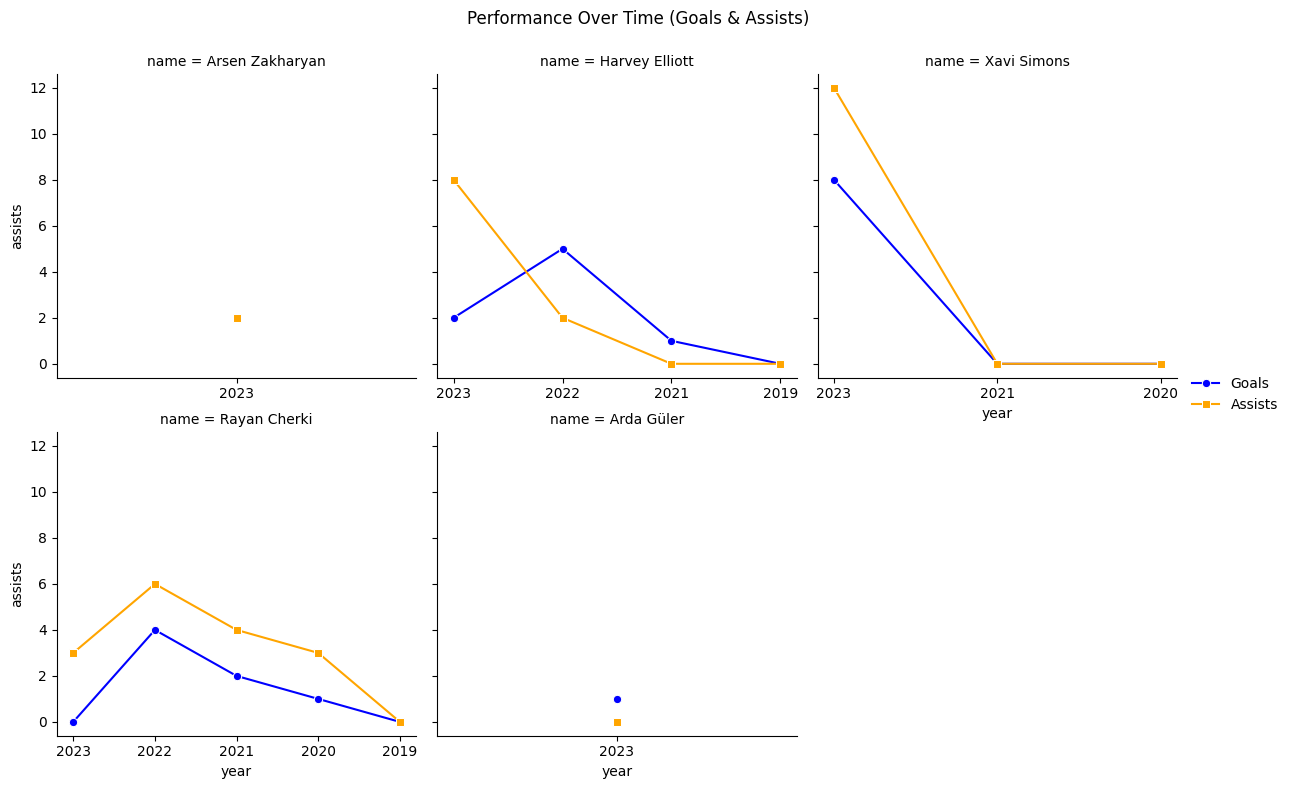

In [24]:
# Filter 'attack_mid_youth_yearly' for relevant columns
performance_data = attack_mid_youth_yearly[['name', 'year', 'goals', 'assists']]

# Plotting performance over time for each player
g = sns.FacetGrid(performance_data, col='name', col_wrap=3, height=4, sharex=False)
g.map_dataframe(sns.lineplot, x='year', y='goals', color='blue', marker='o', label='Goals')
g.map_dataframe(sns.lineplot, x='year', y='assists', color='orange', marker='s', label='Assists')
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Performance Over Time (Goals & Assists)')
plt.show()


These plots suggest a positive trajectory for Harvey Elliot and Xavi Simmons. Insufficient data for Arsen Zakharyan and Arda Guller. However, a drop in Rayan Cherki's performance is noted (could signify a dip in form which is a key metric for a player before investing)

2. Market Value vs. Performance
Compare each player's market value to their on-field performance (aggregate) metrics like goals and assists. This can help identify players who may be undervalued or overvalued based on their contributions.

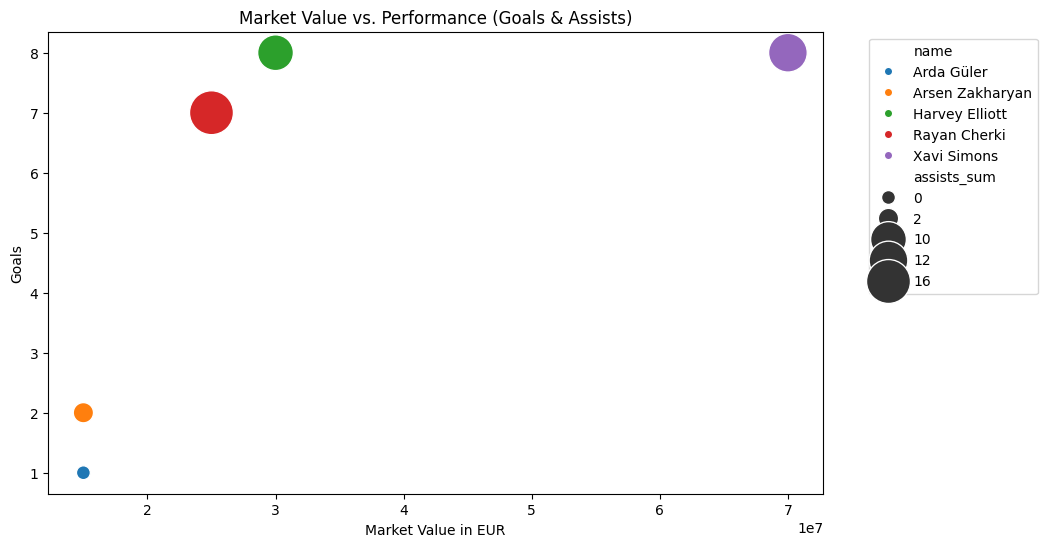

In [25]:
# Aggregate performance data from 'attack_mid_youth_master'
performance_agg = attack_mid_youth_master.groupby('name')[['goals_sum', 'assists_sum']].sum().reset_index()

# Merge with market value data from 'attack_mid_youth_yearly'
market_value_data = attack_mid_youth_yearly[['name', 'market_value_in_eur']].drop_duplicates()
comparison_df = pd.merge(performance_agg, market_value_data, on='name')

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=comparison_df, x='market_value_in_eur', y='goals_sum', size='assists_sum', hue='name', legend='full', sizes=(100, 1000))
plt.title('Market Value vs. Performance (Goals & Assists)')
plt.xlabel('Market Value in EUR')
plt.ylabel('Goals')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


The motive of these plots is to check if there a player whose market value is blown out of proportion. In aggregation, Harvey Elliot and Rayan Cherki have amassed a decent number of goal contributions over the years and their market values remain relatively low. These players potentially fit the criteria of a good investment for a club.

3. Efficiency Analysis
Calculate goals and assists per minute to assess each player's efficiency. Players with higher goals/assists per minute are more impactful in the time they spend on the field.

<ipython-input-26-f49cd1f1e94b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attack_mid_youth_master['goals_per_minute'] = attack_mid_youth_master['goals_sum'] / attack_mid_youth_master['minutes_played_sum']
<ipython-input-26-f49cd1f1e94b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attack_mid_youth_master['assists_per_minute'] = attack_mid_youth_master['assists_sum'] / attack_mid_youth_master['minutes_played_sum']


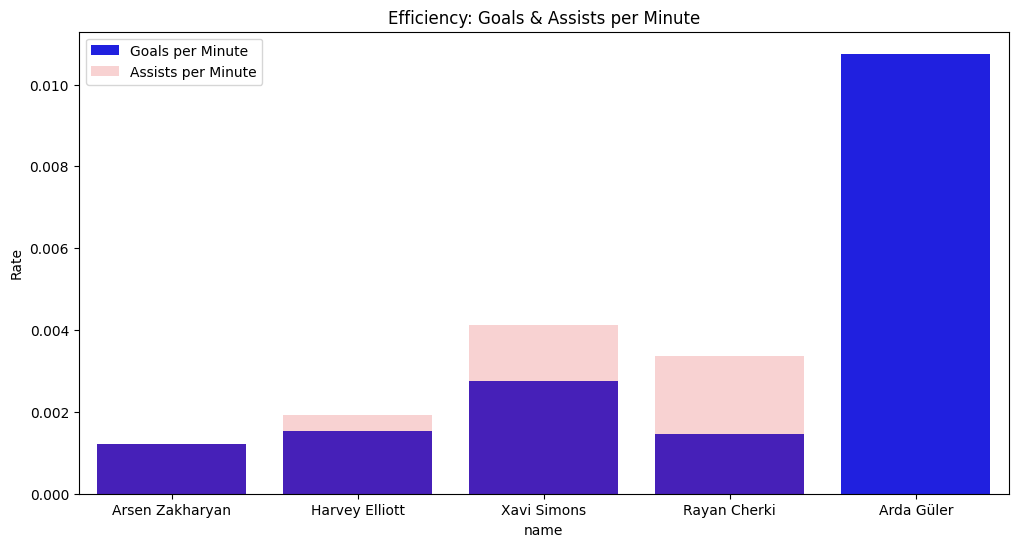

In [26]:
# Calculate goals and assists per minute in 'attack_mid_youth_master'
attack_mid_youth_master['goals_per_minute'] = attack_mid_youth_master['goals_sum'] / attack_mid_youth_master['minutes_played_sum']
attack_mid_youth_master['assists_per_minute'] = attack_mid_youth_master['assists_sum'] / attack_mid_youth_master['minutes_played_sum']

# Visualize
plt.figure(figsize=(12, 6))
sns.barplot(data=attack_mid_youth_master, x='name', y='goals_per_minute', color='blue',  label='Goals per Minute')
sns.barplot(data=attack_mid_youth_master, x='name', y='assists_per_minute', color='red', alpha = 0.2, label='Assists per Minute')
plt.title('Efficiency: Goals & Assists per Minute')
plt.ylabel('Rate')
plt.legend()
plt.show()


Arda Guler stands out since he has played very few games for the team. However, among other players who have played a decent number of minutes on average, Rayan Cherki, Harvey Elliot and Xavi Simmons have produced a good output for the team on the pitch compared to Arsen Zakharyan. Rayan and Xavi have a higher rate of assisting per minute than Harvey and Arsen while Harvey and Xavi bring a better rate of goals per minute than Rayan.

4. Player Discipline



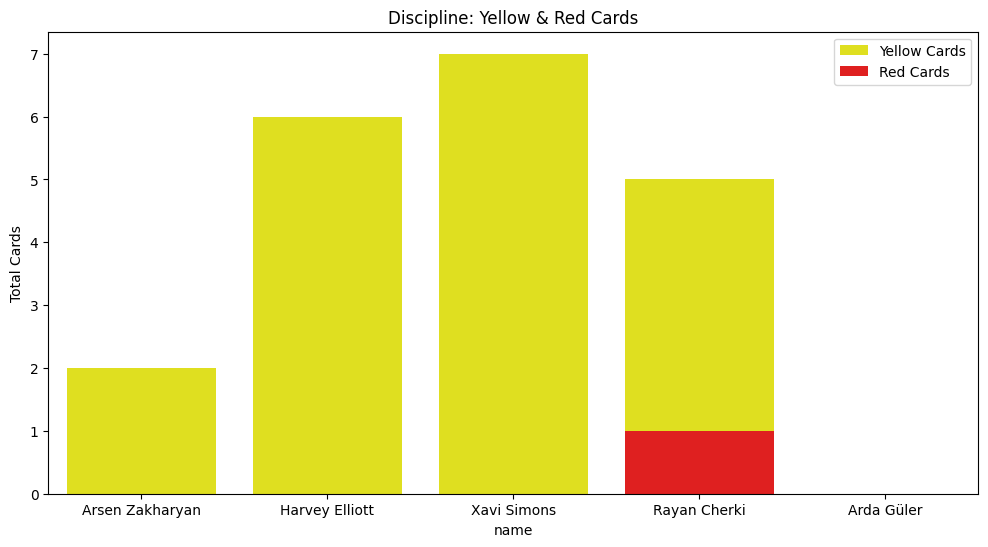

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(data=attack_mid_youth_master, x='name', y='yellow_cards_sum', color='yellow', label='Yellow Cards')
sns.barplot(data=attack_mid_youth_master, x='name', y='red_cards_sum', color='red',  label='Red Cards')
plt.title('Discipline: Yellow & Red Cards')
plt.ylabel('Total Cards')
plt.legend()
plt.show()


Going over player's discipline helps us analyze if there are any cases that stand out in terms of being a bad fruit of the bunch. All the players seem to have a standard number of cards obtained and nothing seems out of the ordinary.

5. Substitution Dynamics of the players

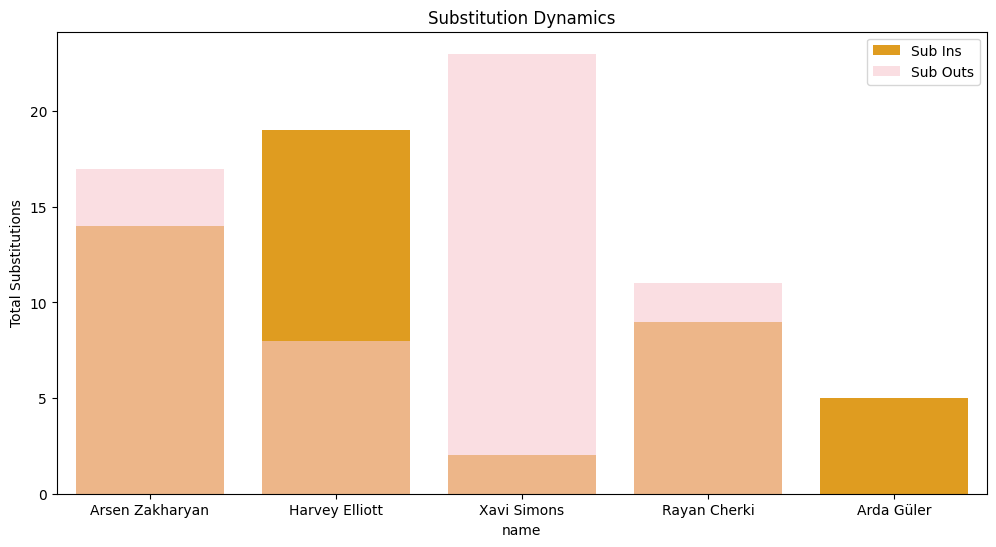

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(data=attack_mid_youth_master, x='name', y='sub_ins_sum', color='orange', label='Sub Ins')
sns.barplot(data=attack_mid_youth_master, x='name', y='sub_outs_sum', color='pink', alpha=0.6, label='Sub Outs')
plt.title('Substitution Dynamics')
plt.ylabel('Total Substitutions')
plt.legend()
plt.show()


The substitution dynamics tell us how these players are being used so far in their current clubs and brings context to their performances. Youth players are usually used as sub-ins for a team as they develop, but Xavi Simmons transcends this notion and displays first-team quality. Having been subbed out more times than being subbed in suggests that he starts for the team more often than being on the bench which would indicate that the player has the trust of the current team and manager. This could bode well for the player and could be used as a metric when being considered as an investment opportunity for another club. Harvey Elliot is on the cusp of making this transition. Arsen and Rayan are often called for sub-ins as well while Arda hasn't gotten opportunity to prove himself. (Assumption: Youth players usually don't play the entirety of the game)

#### Conclusions:

1. Harvey Elliott exhibits an impressive upward trend in his performance over time, paralleled by a notable efficiency on the field in terms of goals per minute, signaling consistent development and untapped potential. His market value appears modest relative to his goal contributions, presenting an attractive prospect for clubs seeking value for money.

2. Xavi Simons has demonstrated remarkable first-team quality, reflected by his frequent starting position and lower substitution rate. His performance trend, combined with a robust efficiency in both goals and assists, underlines his value on the pitch. His ability to influence games and consistent performance suggests he is a sound investment, likely to contribute immediately and in the long term.

3. Rayan Cherki, while showing a decline in form, maintains a high level of assist efficiency. The dip in performance might be a temporary form issue or could point to underlying issues needing attention. However, his reasonable market value coupled with a high assists rate presents a potentially high-reward investment if his form can be rejuvenated.

4. Arsen Zakharyan and Arda Güler have less data to draw from, limiting a definitive assessment of their trajectory. Güler, in particular, stands out for his goals-per-minute efficiency, but the small sample size suggests caution. Further monitoring of their development and more consistent playtime is required to adequately judge their potential for investment.

5. In terms of discipline, no player appears to be particularly problematic, which is promising for clubs concerned about the impact of disciplinary issues on team dynamics.

6. Overall, Harvey Elliott and Xavi Simons emerge as the strongest candidates for investment based on the analyzed data. Elliott offers an excellent price-to-performance ratio, while Simons showcases qualities of a developed and reliable midfielder. Both players could be expected to enhance a club's performance with their current trajectory and skill set. Clubs should consider these factors in the context of their strategic needs and the potential for these young talents to integrate into their existing squad dynamics.

## Second Business Problem

In [29]:
players_2023.head()

,player_id,name,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,...,sub_ins,sub_outs,yellow_cards,red_cards,win_pct,goals_assists,goals_pct,assists_pct,avg_mins_played,age
0,3333,James Milner,England,1986-01-04,Central Midfield,Midfield,right,175,1000000,21000000,...,5,13,3,0,0.200000,2,0.000000,0.058824,47.750000,38
1,7161,Jonas Hofmann,Germany,1992-07-14,Attacking Midfield,Midfield,right,176,13000000,16000000,...,10,19,4,0,0.411765,16,0.074468,0.095745,61.147059,32
2,7825,Pepe Reina,Spain,1982-08-31,Goalkeeper,Goalkeeper,right,188,700000,22000000,...,0,0,1,0,0.363636,0,0.000000,0.000000,95.454545,42
3,12282,Daley Blind,Netherlands,1990-03-09,Centre-Back,Defender,left,180,3000000,25000000,...,2,1,6,0,0.333333,5,0.049180,0.032787,85.666667,34
4,12907,Alessio Cragno,Italy,1994-06-28,Goalkeeper,Goalkeeper,right,184,2500000,20000000,...,0,0,0,0,0.000000,0,0.000000,0.000000,97.500000,30


In [30]:
fcb = players_2023[players_2023['club_ids'].str.contains('131')]

In [31]:
fcb

,player_id,name,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,...,sub_ins,sub_outs,yellow_cards,red_cards,win_pct,goals_assists,goals_pct,assists_pct,avg_mins_played,age
36,38253,Robert Lewandowski,Poland,1988-08-21,Centre-Forward,Attack,right,185,20000000,90000000,...,4,8,4,0,0.263158,26,0.240506,0.088608,77.105263,36
79,53622,İlkay Gündoğan,Germany,1990-10-24,Central Midfield,Midfield,right,180,18000000,50000000,...,5,6,3,0,0.243902,15,0.059524,0.119048,80.121951,33
122,66100,Oriol Romeu,Spain,1991-09-24,Defensive Midfield,Midfield,right,183,3000000,12000000,...,14,13,4,0,0.233333,1,0.000000,0.015873,41.966667,33
146,74857,Marc-André ter Stegen,Germany,1992-04-30,Goalkeeper,Goalkeeper,right,187,35000000,90000000,...,0,0,2,0,0.208333,0,0.000000,0.000000,90.000000,32
181,85370,Sergi Roberto,Spain,1992-02-07,Central Midfield,Midfield,right,178,3000000,60000000,...,7,5,5,0,0.400000,5,0.081081,0.054054,49.733333,32
265,112515,Marcos Alonso,Spain,1990-12-28,Left-Back,Defender,left,188,3000000,45000000,...,3,3,0,0,0.285714,0,0.000000,0.000000,42.714286,33
410,158863,Iñigo Martínez,Spain,1991-05-17,Centre-Back,Defender,left,182,8000000,32000000,...,6,3,5,0,0.294118,0,0.000000,0.000000,62.529412,33
491,182712,João Cancelo,Portugal,1994-05-27,Right-Back,Defender,right,182,40000000,70000000,...,3,8,5,0,0.187500,8,0.063492,0.063492,78.593750,30
561,196948,Andreas Christensen,Denmark,1996-04-10,Centre-Back,Defender,right,187,40000000,40000000,...,2,20,7,0,0.212121,2,0.000000,0.028571,71.909091,28
888,283170,Iñaki Peña,Spain,1999-03-02,Goalkeeper,Goalkeeper,right,184,8000000,8000000,...,0,0,0,0,0.294118,0,0.000000,0.000000,91.764706,25


In [32]:
players_for_renewal_fcb = fcb[fcb['term_days_remaining'] < 730]
players_for_renewal_fcb

,player_id,name,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,...,sub_ins,sub_outs,yellow_cards,red_cards,win_pct,goals_assists,goals_pct,assists_pct,avg_mins_played,age
79,53622,İlkay Gündoğan,Germany,1990-10-24,Central Midfield,Midfield,right,180,18000000,50000000,...,5,6,3,0,0.243902,15,0.059524,0.119048,80.121951,33
181,85370,Sergi Roberto,Spain,1992-02-07,Central Midfield,Midfield,right,178,3000000,60000000,...,7,5,5,0,0.400000,5,0.081081,0.054054,49.733333,32
265,112515,Marcos Alonso,Spain,1990-12-28,Left-Back,Defender,left,188,3000000,45000000,...,3,3,0,0,0.285714,0,0.000000,0.000000,42.714286,33
410,158863,Iñigo Martínez,Spain,1991-05-17,Centre-Back,Defender,left,182,8000000,32000000,...,6,3,5,0,0.294118,0,0.000000,0.000000,62.529412,33
491,182712,João Cancelo,Portugal,1994-05-27,Right-Back,Defender,right,182,40000000,70000000,...,3,8,5,0,0.187500,8,0.063492,0.063492,78.593750,30
1550,462250,João Félix,Portugal,1999-11-10,Left Winger,Attack,right,181,40000000,100000000,...,11,18,5,0,0.212121,13,0.119403,0.074627,53.848485,24
1566,466794,Eric García,Spain,2001-01-09,Centre-Back,Defender,right,182,15000000,20000000,...,2,4,3,0,0.347826,2,0.037736,0.000000,80.347826,23
1569,466810,Ansu Fati,Spain,2002-10-31,Left Winger,Attack,right,178,30000000,80000000,...,17,8,3,0,0.192308,5,0.093023,0.023256,38.461538,21
2300,937955,Héctor Fort,Spain,2006-08-02,Right-Back,Defender,right,185,1000000,1000000,...,3,2,1,0,0.333333,2,0.000000,0.117647,57.166667,18
2302,938158,Marc Guiu,Spain,2006-01-04,Centre-Forward,Attack,right,187,2500000,2500000,...,5,2,2,0,0.142857,2,0.142857,0.000000,26.000000,18


In [33]:
players_2023.head()

,player_id,name,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,...,sub_ins,sub_outs,yellow_cards,red_cards,win_pct,goals_assists,goals_pct,assists_pct,avg_mins_played,age
0,3333,James Milner,England,1986-01-04,Central Midfield,Midfield,right,175,1000000,21000000,...,5,13,3,0,0.200000,2,0.000000,0.058824,47.750000,38
1,7161,Jonas Hofmann,Germany,1992-07-14,Attacking Midfield,Midfield,right,176,13000000,16000000,...,10,19,4,0,0.411765,16,0.074468,0.095745,61.147059,32
2,7825,Pepe Reina,Spain,1982-08-31,Goalkeeper,Goalkeeper,right,188,700000,22000000,...,0,0,1,0,0.363636,0,0.000000,0.000000,95.454545,42
3,12282,Daley Blind,Netherlands,1990-03-09,Centre-Back,Defender,left,180,3000000,25000000,...,2,1,6,0,0.333333,5,0.049180,0.032787,85.666667,34
4,12907,Alessio Cragno,Italy,1994-06-28,Goalkeeper,Goalkeeper,right,184,2500000,20000000,...,0,0,0,0,0.000000,0,0.000000,0.000000,97.500000,30


In [34]:
master=master.merge(players_2023[['player_id','market_value_in_eur','highest_market_value_in_eur']], on='player_id', how='left')
master

,player_id,name,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,games_played_sum,goals_sum,...,red_cards_sum,goals_assists_sum,club_ids_all,win_pct_all,goals_pct_all,assists_pct_all,avg_mins_played_all,age,market_value_in_eur,highest_market_value_in_eur
0,3333,James Milner,England,1986-01-04,Central Midfield,Midfield,right,175.0,212,9,...,0,26,"[1237, 31]",0.306604,0.020045,0.037862,44.462264,38,1000000,21000000
1,7161,Jonas Hofmann,Germany,1992-07-14,Attacking Midfield,Midfield,right,176.0,186,52,...,0,103,"[18, 15]",0.231183,0.135417,0.132812,73.204301,32,13000000,16000000
2,7825,Pepe Reina,Spain,1982-08-31,Goalkeeper,Goalkeeper,right,188.0,117,0,...,0,1,"[1050, 5, 398, 405]",0.205128,0.000000,0.004545,91.008547,42,700000,22000000
3,12282,Daley Blind,Netherlands,1990-03-09,Centre-Back,Defender,left,180.0,51,3,...,0,7,"[12321, 610, 27]",0.313725,0.022556,0.030075,76.725490,34,3000000,25000000
4,12907,Alessio Cragno,Italy,1994-06-28,Goalkeeper,Goalkeeper,right,184.0,134,0,...,0,0,"[1390, 6574, 2919]",0.067164,0.000000,0.000000,90.223881,30,2500000,20000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,1111912,Adama Bojang,The Gambia,2004-05-28,Centre-Forward,Attack,right,191.0,5,0,...,0,0,[1421],0.200000,0.000000,0.000000,6.800000,20,500000,500000
2346,1146029,Juanma Herzog,Spain,2004-05-13,Centre-Back,Defender,right,186.0,6,1,...,0,1,[472],0.500000,0.090909,0.000000,83.166667,20,1000000,1000000
2347,1159022,Mateus Lusuardi,Brazil,2004-01-08,Centre-Back,Defender,left,190.0,5,0,...,0,0,[8970],0.200000,0.000000,0.000000,79.000000,20,50000,50000
2348,1176345,Mahamadou Nagida,Cameroon,2005-06-28,Left-Back,Defender,left,176.0,6,0,...,0,0,[273],0.333333,0.000000,0.000000,35.833333,19,150000,150000


In [35]:
central_mf = master[master['sub_position']=='Central Midfield']
central_mf

,player_id,name,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,games_played_sum,goals_sum,...,red_cards_sum,goals_assists_sum,club_ids_all,win_pct_all,goals_pct_all,assists_pct_all,avg_mins_played_all,age,market_value_in_eur,highest_market_value_in_eur
0,3333,James Milner,England,1986-01-04,Central Midfield,Midfield,right,175.0,212,9,...,0,26,"[1237, 31]",0.306604,0.020045,0.037862,44.462264,38,1000000,21000000
19,27992,Luka Modric,Croatia,1985-09-09,Central Midfield,Midfield,right,172.0,207,20,...,1,59,[418],0.314010,0.046729,0.091121,67.202899,39,10000000,55000000
26,31909,Toni Kroos,Germany,1990-01-04,Central Midfield,Midfield,right,183.0,214,13,...,0,44,[418],0.294393,0.030093,0.071759,74.514019,34,14000000,80000000
50,42072,Tobias Kempe,Germany,1989-06-27,Central Midfield,Midfield,right,184.0,18,3,...,0,5,[105],0.055556,0.136364,0.090909,52.722222,35,500000,1250000
56,44466,Sebastian Rode,Germany,1990-10-11,Central Midfield,Midfield,right,179.0,166,10,...,0,17,[24],0.180723,0.034483,0.024138,58.909639,34,1000000,10000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2299,936981,Gustavo Puerta,Colombia,2003-07-23,Central Midfield,Midfield,right,173.0,8,0,...,0,0,[15],0.375000,0.000000,0.000000,26.375000,21,2000000,2000000
2303,938729,Mikel Jauregizar,Spain,2003-11-13,Central Midfield,Midfield,right,177.0,7,0,...,0,0,[621],0.142857,0.000000,0.000000,14.857143,20,200000,200000
2305,941869,Yellu Santiago,Spain,2004-05-25,Central Midfield,Midfield,right,192.0,5,0,...,0,0,[3709],0.000000,0.000000,0.000000,34.400000,20,100000,100000
2334,1053147,Mahamadou Diawara,France,2005-02-17,Central Midfield,Midfield,left,187.0,10,0,...,0,0,[1041],0.300000,0.000000,0.000000,34.500000,19,3000000,3000000


<ipython-input-36-454ca4b23372>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  central_mf['goals_assists_sum'] = central_mf['goals_sum'] + central_mf['assists_sum']


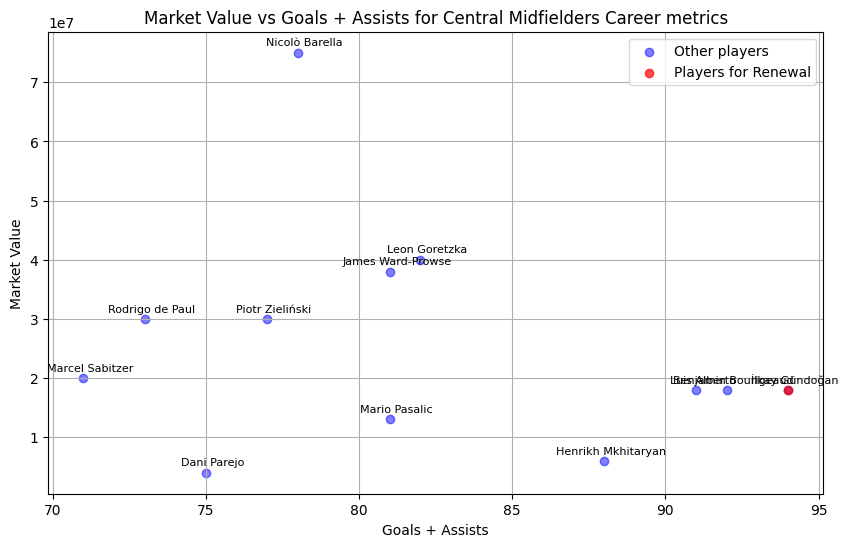

In [36]:
central_mf = master[(master['sub_position'] == 'Central Midfield') &
                                    (master['goals_sum'] + master['assists_sum'] > 70)]

# Calculate the sum of goals and assists
central_mf['goals_assists_sum'] = central_mf['goals_sum'] + central_mf['assists_sum']

# Plot graph
plt.figure(figsize=(10, 6))

# Plot all players
plt.scatter(central_mf['goals_assists_sum'], central_mf['market_value_in_eur'], color='blue', alpha=0.5, label='Other players')

# Annotate all players
for index, player in central_mf.iterrows():
    plt.annotate(player['name'], (player['goals_assists_sum'], player['market_value_in_eur']),
                 textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)

# Mark players for renewal with a different color
for index, player in central_mf.iterrows():
    if player['player_id'] in players_for_renewal_fcb['player_id'].values:
        plt.scatter(player['goals_assists_sum'], player['market_value_in_eur'], color='red', alpha=0.7, label='Players for Renewal')

plt.title('Market Value vs Goals + Assists for Central Midfielders Career metrics')
plt.xlabel('Goals + Assists')
plt.ylabel('Market Value')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-37-610bdb6520b2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  central_mf_2023['goals_assists'] = central_mf_2023['goals'] + central_mf_2023['assists']


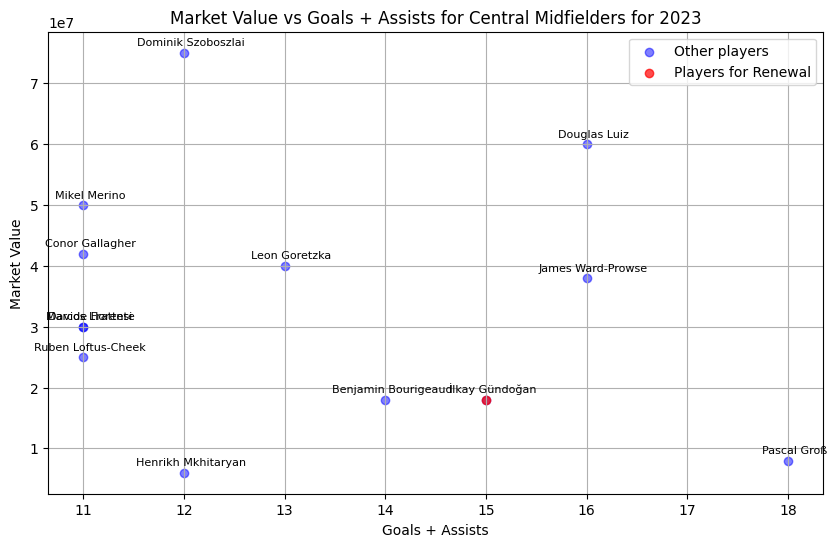

In [37]:
central_mf_2023 = players_2023[(players_2023['sub_position'] == 'Central Midfield') &
                                    (players_2023['goals'] + players_2023['assists'] > 10)]

# Calculate the sum of goals and assists
central_mf_2023['goals_assists'] = central_mf_2023['goals'] + central_mf_2023['assists']

# Plot graph
plt.figure(figsize=(10, 6))

# Plot all players
plt.scatter(central_mf_2023['goals_assists'], central_mf_2023['market_value_in_eur'], color='blue', alpha=0.5, label='Other players')

# Annotate all players
for index, player in central_mf_2023.iterrows():
    plt.annotate(player['name'], (player['goals_assists'], player['market_value_in_eur']),
                 textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)

# Mark players for renewal with a different color
for index, player in central_mf_2023.iterrows():
    if player['player_id'] in players_for_renewal_fcb['player_id'].values:
        plt.scatter(player['goals_assists'], player['market_value_in_eur'], color='red', alpha=0.7, label='Players for Renewal')

plt.title('Market Value vs Goals + Assists for Central Midfielders for 2023')
plt.xlabel('Goals + Assists')
plt.ylabel('Market Value')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
set(central_mf['name']) & set(central_mf_2023['name'])

{'Benjamin Bourigeaud',
 'Henrikh Mkhitaryan',
 'James Ward-Prowse',
 'Leon Goretzka',
 'İlkay Gündoğan'}

In [39]:
shortlist_for_gundo = ['Benjamin Bourigeaud',
 'Henrikh Mkhitaryan',
 'James Ward-Prowse',
 'Leon Goretzka',
 'İlkay Gündoğan']

In [40]:
shortlist_for_gundo_master = master[master['name'].isin(shortlist_for_gundo)]

shortlist_for_gundo_yearly = extract_players_info_to_df(yearly_datasets, shortlist_for_gundo)

In [41]:
#shortlist_for_gundo_master[(shortlist_for_gundo_master['age'] > 30) & (shortlist_for_gundo_master['name'] != 'İlkay Gündoğan')]

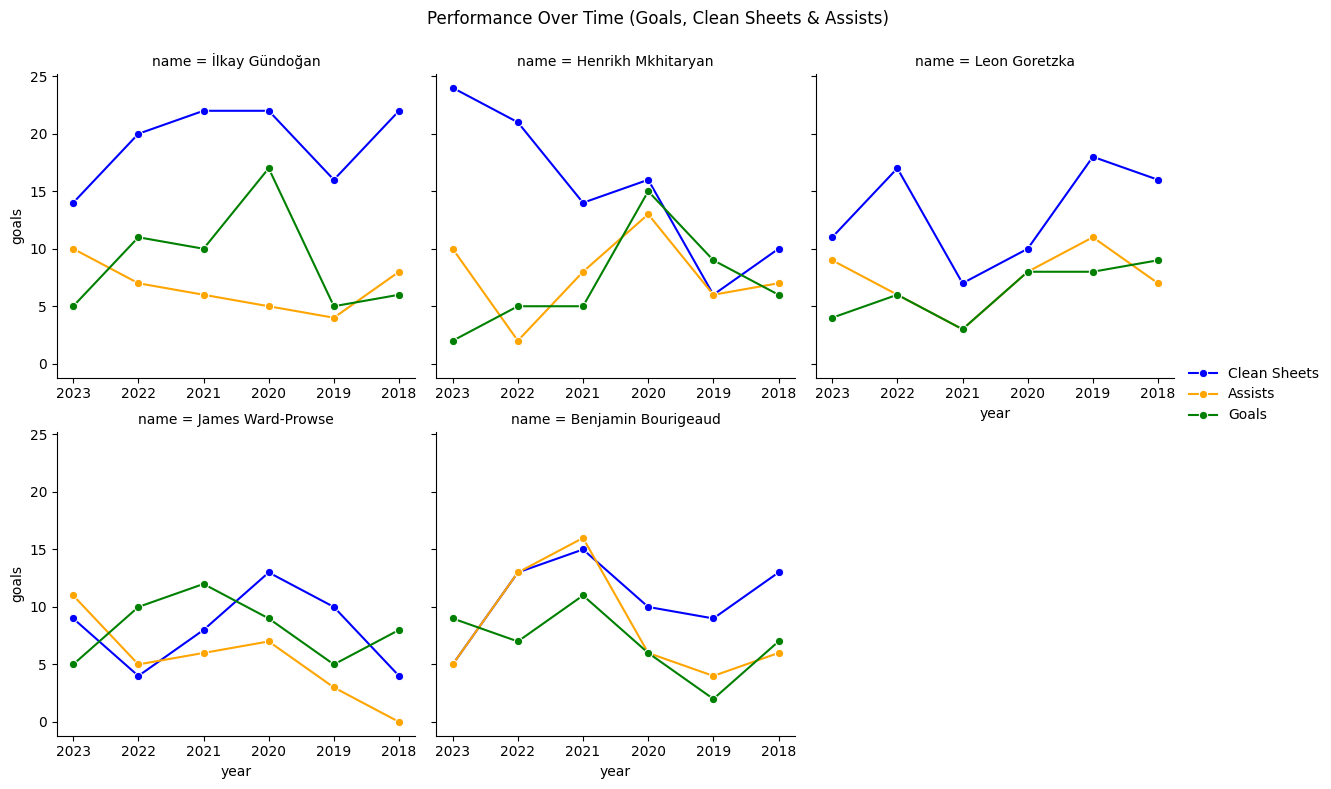

In [42]:
# Filter 'central_mid_youth_yearly' for relevant columns
performance_data = shortlist_for_gundo_yearly[['name', 'year', 'clean_sheets', 'assists', 'goals']]

# Plotting performance over time for each player
g = sns.FacetGrid(performance_data, col='name', col_wrap=3, height=4, sharex=False)
g.map_dataframe(sns.lineplot, x='year', y='clean_sheets', color='blue', marker='o', label='Clean Sheets')
g.map_dataframe(sns.lineplot, x='year', y='assists', color='orange', marker='o', label='Assists')
g.map_dataframe(sns.lineplot, x='year', y='goals', color='green', marker='o', label='Goals')
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Performance Over Time (Goals, Clean Sheets & Assists)')
plt.show()

In [43]:
shortlist_for_gundo_master.columns

Index(['player_id', 'name', 'country_of_citizenship', 'date_of_birth',
       'sub_position', 'position', 'foot', 'height_in_cm', 'games_played_sum',
       'goals_sum', 'minutes_played_sum', 'wins_sum', 'club_goals_sum',
       'assists_sum', 'clean_sheets_sum', 'headers_sum',
       'direct_freekicks_sum', 'penalties_sum', 'long_distance_kicks_sum',
       'solo_runs_sum', 'counter_attack_goals_sum', 'sub_ins_sum',
       'sub_outs_sum', 'yellow_cards_sum', 'red_cards_sum',
       'goals_assists_sum', 'club_ids_all', 'win_pct_all', 'goals_pct_all',
       'assists_pct_all', 'avg_mins_played_all', 'age', 'market_value_in_eur',
       'highest_market_value_in_eur'],
      dtype='object')

<ipython-input-44-6ae4ed2edec8>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=shortlist_for_gundo_master, x='name', y='market_value_in_eur', marker='o', palette="viridis")  # Rotate the x labels so they don't overlap


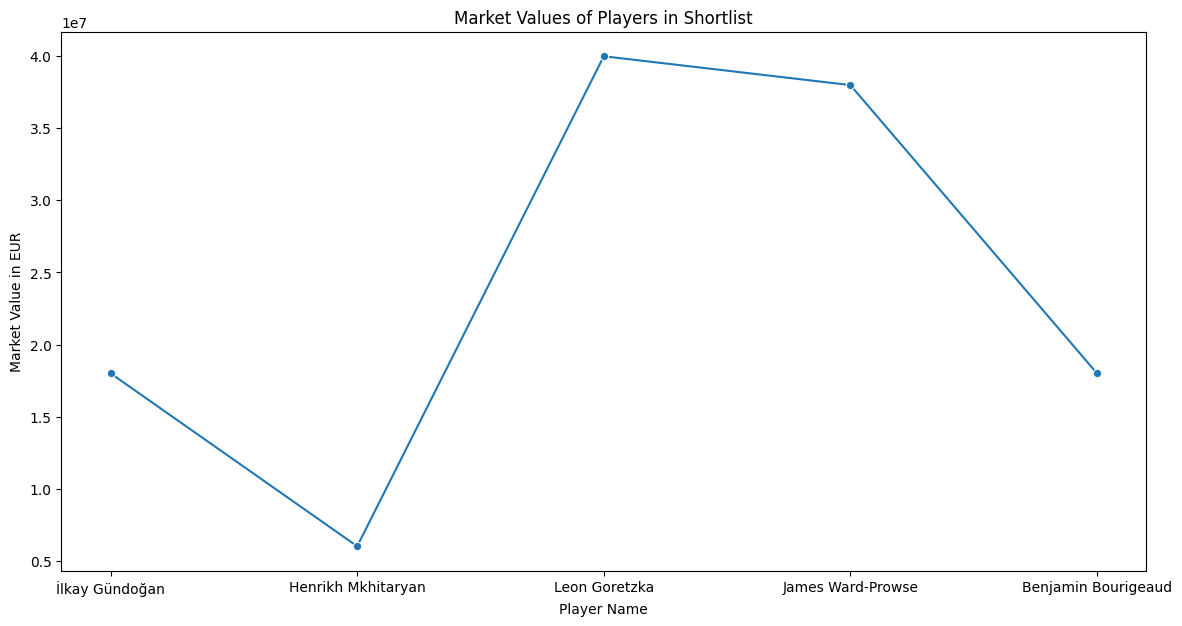

In [44]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=shortlist_for_gundo_master, x='name', y='market_value_in_eur', marker='o', palette="viridis")  # Rotate the x labels so they don't overlap
plt.title('Market Values of Players in Shortlist')
plt.xlabel('Player Name')
plt.ylabel('Market Value in EUR')
plt.show()

<ipython-input-45-38ab64629030>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=shortlist_for_gundo_master, x='name', y='height_in_cm', marker='o', palette="viridis")


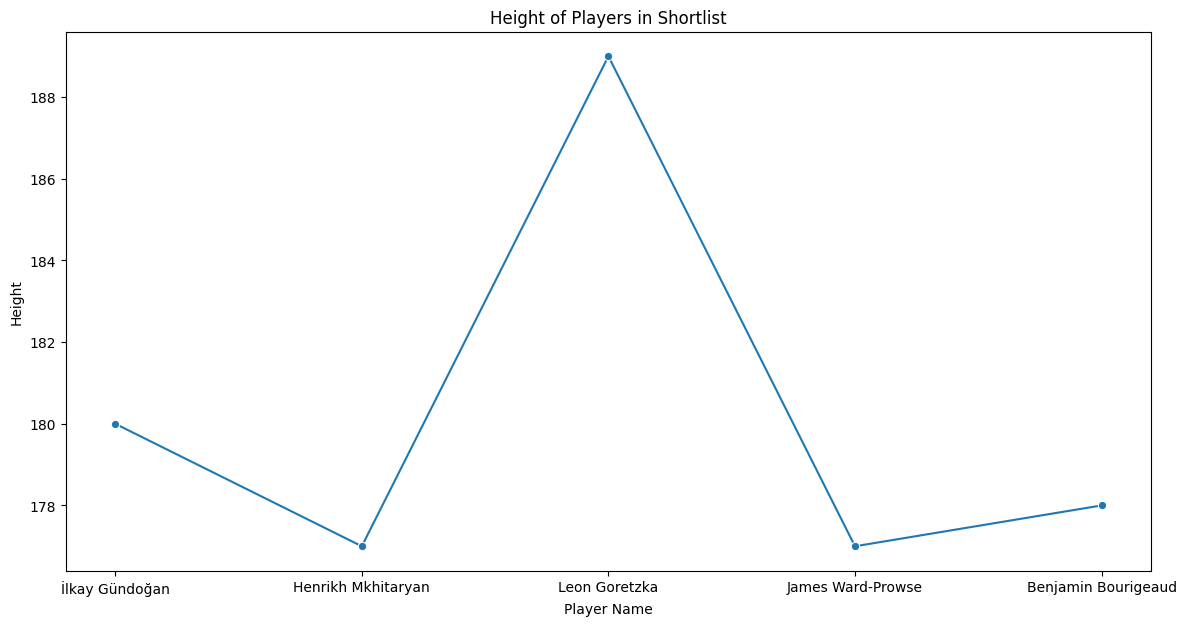

In [45]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=shortlist_for_gundo_master, x='name', y='height_in_cm', marker='o', palette="viridis")
plt.title('Height of Players in Shortlist')
plt.xlabel('Player Name')
plt.ylabel('Height')
plt.show()

### ideas

idea1: market value prediction from features where value is target and rest variables are features.

In [46]:
attack_mid_youth_master.columns

Index(['player_id', 'name', 'country_of_citizenship', 'date_of_birth',
       'sub_position', 'position', 'foot', 'height_in_cm', 'games_played_sum',
       'goals_sum', 'minutes_played_sum', 'wins_sum', 'club_goals_sum',
       'assists_sum', 'clean_sheets_sum', 'headers_sum',
       'direct_freekicks_sum', 'penalties_sum', 'long_distance_kicks_sum',
       'solo_runs_sum', 'counter_attack_goals_sum', 'sub_ins_sum',
       'sub_outs_sum', 'yellow_cards_sum', 'red_cards_sum',
       'goals_assists_sum', 'club_ids_all', 'win_pct_all', 'goals_pct_all',
       'assists_pct_all', 'avg_mins_played_all', 'age', 'goals_per_minute',
       'assists_per_minute'],
      dtype='object')

<ipython-input-47-53ee3aa63ef5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impact_matrix[col + '_norm'] = (impact_matrix[col] - impact_matrix[col].min()) / (impact_matrix[col].max() - impact_matrix[col].min())
<ipython-input-47-53ee3aa63ef5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impact_matrix[col + '_norm'] = (impact_matrix[col] - impact_matrix[col].min()) / (impact_matrix[col].max() - impact_matrix[col].min())
<ipython-input-47-53ee3aa63ef5>:7: SettingWithCopyWarning: 
A value is trying to

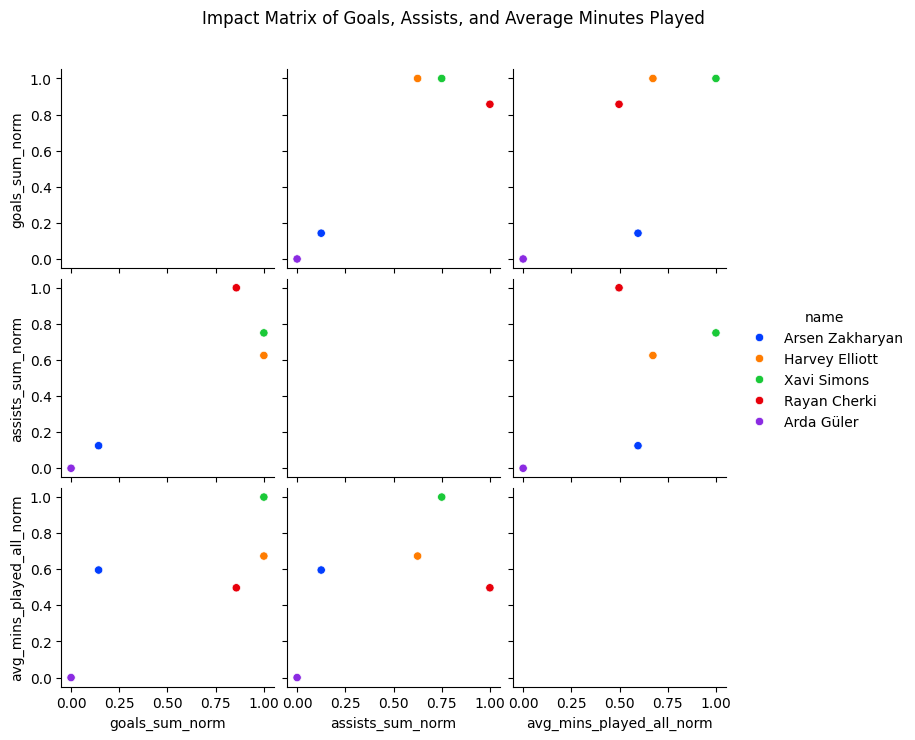

In [47]:
# seems useless

impact_matrix = attack_mid_youth_master[['name', 'goals_sum', 'assists_sum', 'avg_mins_played_all']]

# Normalize the columns for plotting
for col in ['goals_sum', 'assists_sum', 'avg_mins_played_all']:
    impact_matrix[col + '_norm'] = (impact_matrix[col] - impact_matrix[col].min()) / (impact_matrix[col].max() - impact_matrix[col].min())

# Plot the impact matrix
sns.pairplot(impact_matrix, vars=['goals_sum_norm', 'assists_sum_norm', 'avg_mins_played_all_norm'], hue='name', palette='bright', markers='o', diag_kind='kde')
plt.suptitle('Impact Matrix of Goals, Assists, and Average Minutes Played')
plt.subplots_adjust(top=0.9)
plt.show()



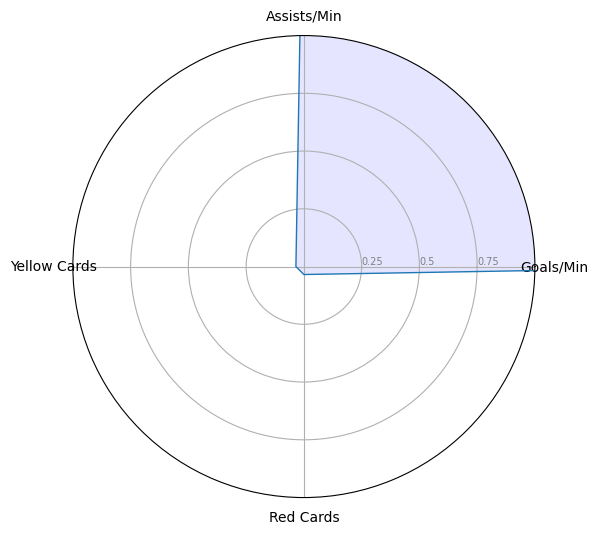

In [48]:
## test graph, left here for future

from math import pi

# Sample player data
player_data = attack_mid_youth_master.iloc[0][['goals_sum', 'assists_sum', 'goals_pct_all', 'assists_pct_all']].tolist()
attributes = ['Goals/Min', 'Assists/Min', 'Yellow Cards', 'Red Cards']
values = player_data

# Number of variables
num_vars = len(attributes)

# Compute angle for each axis
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
values += values[:1]
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.xticks(angles[:-1], attributes)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.25, 0.5, 0.75], ["0.25","0.5","0.75"], color="grey", size=7)
plt.ylim(0,1)

# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')

# Fill area
ax.fill(angles, values, 'b', alpha=0.1)

plt.show()
